### Taking the SCT text files and combining them into a single DataFrame

In [1]:
#from collections import defaultdict
#from pathlib import Path
import json

import os 
import time 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
russell_df = pd.read_csv('russell_3000_index.csv')

ticker_list = russell_df['Ticker']

In [3]:
#seeding the DataFrame
#reading the data from a file
with open('SCT_datasets/A_SCTpay_20220906.txt') as f:
    a_txt = f.read()
    
#converting the text string into a dictionary
a_dict = json.loads(a_txt)

starter_df = pd.DataFrame(a_dict)

In [4]:
start_time = time.time()

for ticker in ticker_list:
    try:
        with open(f'SCT_datasets/{ticker}_SCTpay_20220906.txt') as f:
            ticker_txt = f.read()
        ticker_dict = json.loads(ticker_txt)    
        #ticker_df = pd.DataFrame(ticker_dict)
        starter_df = pd.concat([starter_df,pd.DataFrame(ticker_dict)])
    except:
        print(f'Ticker {ticker} threw an error')
    
        
        
print(f"This code took {time.time() - start_time} seconds")

Ticker XTSLA threw an error
Ticker USD threw an error
Ticker MANH threw an error
Ticker MPW threw an error
Ticker AFG threw an error
Ticker GLOB threw an error
Ticker RRC threw an error
Ticker UGI threw an error
Ticker MSFUT threw an error
Ticker ESU2 threw an error
Ticker RTYU2 threw an error
This code took 42.02050161361694 seconds


In [5]:
starter_df.reset_index(inplace=True,drop=True)

In [6]:
starter_df.head()

,id,cik,ticker,name,position,year,salary,bonus,stockAwards,optionAwards,nonEquityIncentiveCompensation,otherCompensation,total,changeInPensionValueAndDeferredEarnings
0,73b3a60ba203743c008330c96b7d8b66,1090872,A,Sam Raha,"Senior Vice President, President Diagnostics a...",2021,563500,0,1541332,0,738536,33534,3262887,NaN
1,97393f60cd9f321650e472673daaa70c,1090872,A,Michael R. McMullen,Chief Executive Officer,2021,1280000,0,9165390,0,3149714,77512,15967631,NaN
2,83b9cc2bca477fe8ce23e0ab56e70c66,1090872,A,Jacob Thaysen,"Senior Vice President, President Life Sciences...",2021,625000,0,1812285,0,897589,13684,3802349,NaN
3,7c60bb804071675ae15ec930f6dea190,1090872,A,Robert McMahon,"Senior Vice President, Chief Financial Officer",2021,663500,0,2291271,0,1007000,176196,4711733,NaN
4,259b710a8befe67c61a2c3dec14f344a,1090872,A,Padraig McDonnell,"Senior Vice President, President Cross-Lab Group",2021,495000,0,1249771,0,686716,499472,3243927,NaN


<AxesSubplot:xlabel='total', ylabel='salary'>

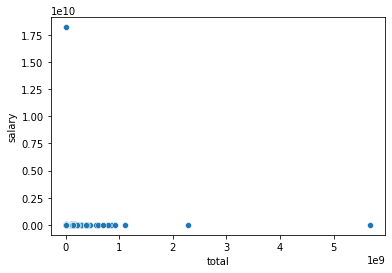

In [7]:
sns.scatterplot(data=starter_df, x='total',y='salary')

<AxesSubplot:xlabel='salary'>

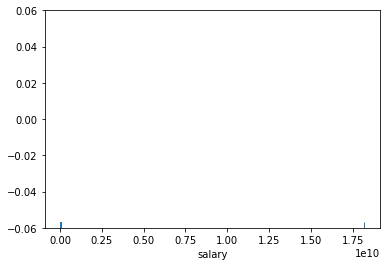

In [8]:
sns.rugplot(x=starter_df['salary'])

<AxesSubplot:xlabel='salary'>

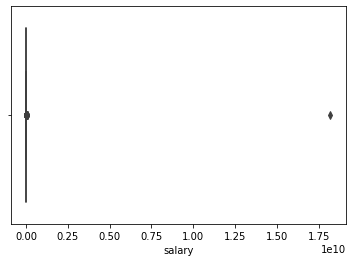

In [9]:
sns.boxplot(x=starter_df['salary'])

In [10]:
starter_df['salary'].max()

18200060667

In [11]:
#find the index of the highest salary
highest_salary_index = starter_df[['salary']].idxmax()

#look at this highest salary, which is clearly incorrect
starter_df.iloc[highest_salary_index]

,id,cik,ticker,name,position,year,salary,bonus,stockAwards,optionAwards,nonEquityIncentiveCompensation,otherCompensation,total,changeInPensionValueAndDeferredEarnings
149457,1e4ef9a59c291947b10235e1cca11435,318300,PEBO,Deborah K. Hill,"Executive Vice President, Consumer and Busines...",2008,18200060667,30000,30135,4436,0,10127,256698,NaN


In [15]:
#this cell is run out of order
#mistakes_df = starter_df.iloc[highest_salary_index].copy()

In [11]:
mistakes_df = pd.concat([mistakes_df,starter_df.iloc[highest_salary_index]])

NameError: name 'mistakes_df' is not defined

In [17]:
#dropping the highest salary row
starter_df.drop(labels=[highest_salary_index[0]],axis=0,inplace=True)
starter_df.reset_index(inplace=True, drop=True)

In [475]:
#mistakes_df.to_csv('mistakes.csv')#,index = False)

In [20]:
bad_ticker_list = pd.read_csv('mistakes.csv')['ticker'].unique()

bad_index_list = pd.read_csv('mistakes.csv')['Unnamed: 0']

In [25]:
#get rid of the bad tickers
starter_df = starter_df[~starter_df['ticker'].isin(bad_ticker_list)]

In [28]:
starter_df.describe()

,year,salary,bonus,stockAwards,optionAwards,nonEquityIncentiveCompensation,otherCompensation,total,changeInPensionValueAndDeferredEarnings
count,173116.000000,1.731160e+05,1.731160e+05,1.731160e+05,1.731160e+05,1.731160e+05,1.731160e+05,1.731160e+05,5.599800e+04
mean,2014.197423,4.820140e+05,9.312163e+05,1.494504e+06,1.424884e+06,9.667322e+05,4.414802e+05,3.297269e+06,1.494591e+05
std,4.545604,3.731142e+05,1.497735e+08,5.588771e+07,1.844805e+08,8.388864e+07,9.141134e+07,1.702662e+07,8.234798e+05
min,2004.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2010.000000,2.879182e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.556000e+03,7.855870e+05,0.000000e+00
50%,2015.000000,4.130860e+05,0.000000e+00,3.379195e+05,0.000000e+00,1.800000e+05,2.622000e+04,1.658577e+06,0.000000e+00
75%,2018.000000,6.000000e+05,9.401250e+03,1.174012e+06,3.325902e+05,5.485542e+05,8.063675e+04,3.540130e+06,9.800000e+03
max,2022.000000,2.000000e+07,5.232056e+10,1.798045e+10,4.999991e+10,1.877108e+10,3.736161e+10,5.682146e+09,6.268528e+07


In [29]:
starter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173116 entries, 0 to 173776
Data columns (total 14 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   id                                       173116 non-null  object 
 1   cik                                      173116 non-null  object 
 2   ticker                                   173116 non-null  object 
 3   name                                     173116 non-null  object 
 4   position                                 173116 non-null  object 
 5   year                                     173116 non-null  int64  
 6   salary                                   173116 non-null  int64  
 7   bonus                                    173116 non-null  int64  
 8   stockAwards                              173116 non-null  int64  
 9   optionAwards                             173116 non-null  int64  
 10  nonEquityIncentiveCompensation  

<AxesSubplot:ylabel='Frequency'>

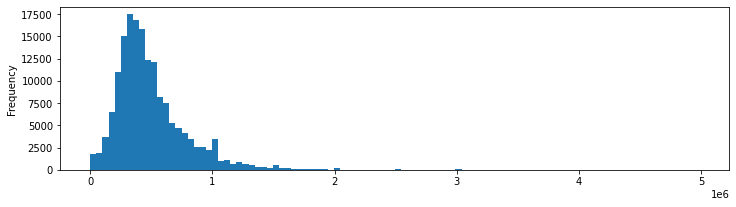

In [31]:
plt.figure(figsize=(12,3))
starter_df[(starter_df['salary'] < 5000000) & (starter_df['salary'] > 0)]['salary'].plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

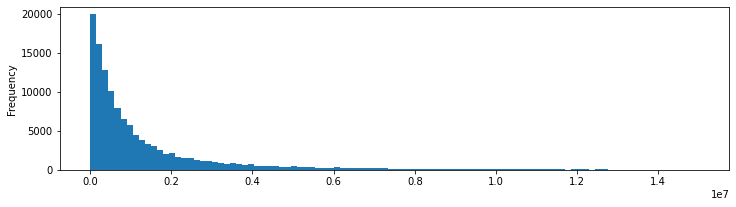

In [30]:
plt.figure(figsize=(12,3))
starter_df[(starter_df['stockAwards'] < 15000000) & (starter_df['stockAwards'] > 0)]['stockAwards'].plot.hist(bins=100)

<AxesSubplot:xlabel='year', ylabel='salary'>

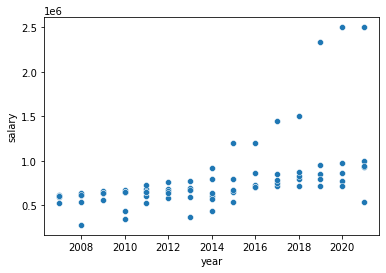

In [27]:
sns.scatterplot(x=starter_df[starter_df['ticker']=='MSFT']['year'],y=starter_df[starter_df['ticker']=='MSFT']['salary'])

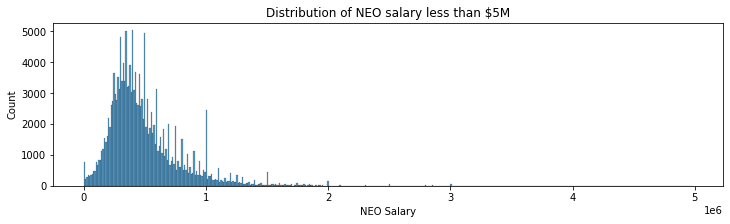

In [33]:
plt.figure(figsize=(12,3))
sns.histplot(starter_df[(starter_df['salary'] < 5000000) & (starter_df['salary'] > 0)]['salary'])
plt.title('Distribution of NEO salary less than $5M')
plt.xlabel('NEO Salary');

C:\Users\reagins\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


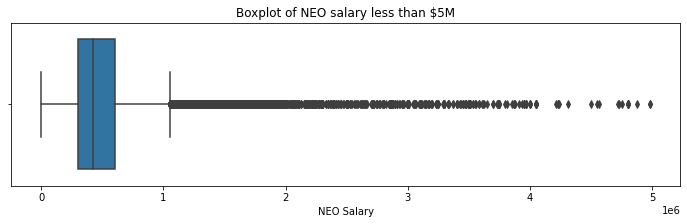

In [38]:
plt.figure(figsize=(12,3))
sns.boxplot(starter_df[(starter_df['salary'] < 5000000) & (starter_df['salary'] > 0)]['salary'])
plt.title('Boxplot of NEO salary less than $5M')
plt.xlabel('NEO Salary');

In [35]:
starter_df[(starter_df['salary'] < 5000000) & (starter_df['salary'] > 0)]['salary'].describe()

count    1.667350e+05
mean     4.959915e+05
std      3.123337e+05
min      1.000000e+00
25%      3.000000e+05
50%      4.243830e+05
75%      6.018050e+05
max      4.981693e+06
Name: salary, dtype: float64

In [40]:
starter_df['salary'].describe()

count    1.731160e+05
mean     4.820140e+05
std      3.731142e+05
min      0.000000e+00
25%      2.879182e+05
50%      4.130860e+05
75%      6.000000e+05
max      2.000000e+07
Name: salary, dtype: float64

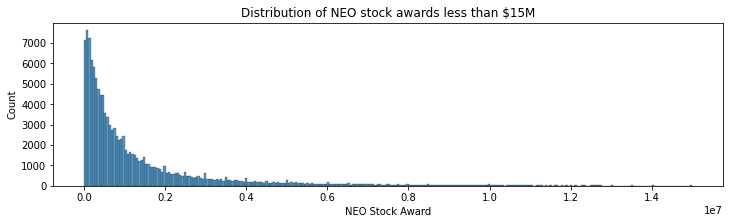

In [46]:
plt.figure(figsize=(12,3))
sns.histplot(starter_df[(starter_df['stockAwards'] < 15000000) & (starter_df['stockAwards'] > 0)]['stockAwards'])
plt.title('Distribution of NEO stock awards less than $15M')

plt.xlabel('NEO Stock Award');

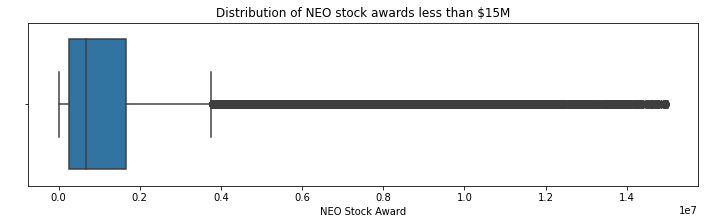

In [45]:
plt.figure(figsize=(12,3))
sns.boxplot(x=starter_df[(starter_df['stockAwards'] < 15000000) & (starter_df['stockAwards'] > 0)]['stockAwards'])
plt.title('Distribution of NEO stock awards less than $15M')
plt.ylabel(' ')
plt.xlabel('NEO Stock Award');

In [51]:
starter_df[starter_df['stockAwards'] > 0]['stockAwards'].describe()

count    1.260110e+05
mean     2.053175e+06
std      6.549725e+07
min      2.000000e+00
25%      2.547365e+05
50%      6.750040e+05
75%      1.702548e+06
max      1.798045e+10
Name: stockAwards, dtype: float64

In [56]:
starter_df['actual_bonus_perc'] = np.round(starter_df['nonEquityIncentiveCompensation'] / starter_df['salary'],4)

In [64]:
starter_df['actual_bonus_perc'] = starter_df['actual_bonus_perc'].fillna(0)

In [66]:
starter_df[(starter_df['actual_bonus_perc'] > 0) & (starter_df['actual_bonus_perc'] < 100)]['actual_bonus_perc'].describe()

count    115158.000000
mean          1.212686
std           2.072090
min           0.000100
25%           0.500000
50%           0.859350
75%           1.384500
max          96.923100
Name: actual_bonus_perc, dtype: float64

Text(0.5, 0, 'Actual Performance Bonus Achieved as a % of Salary')

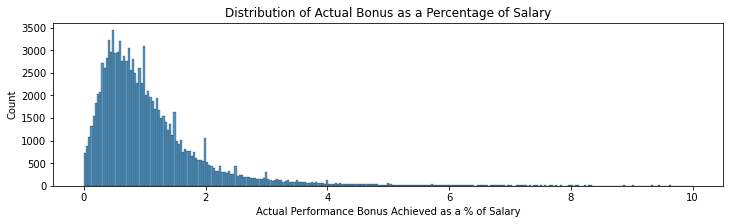

In [71]:
plt.figure(figsize=(12,3))
sns.histplot(starter_df[(starter_df['actual_bonus_perc'] > 0) & (starter_df['actual_bonus_perc'] < 10)]['actual_bonus_perc'])
plt.title('Distribution of Actual Bonus as a Percentage of Salary')
plt.xlabel('Actual Performance Bonus Achieved as a % of Salary')

C:\Users\reagins\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Actual Performance Bonus Achieved as a % of Salary')

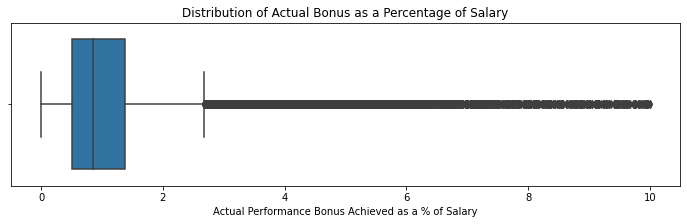

In [72]:
plt.figure(figsize=(12,3))
sns.boxplot(starter_df[(starter_df['actual_bonus_perc'] > 0) & (starter_df['actual_bonus_perc'] < 10)]['actual_bonus_perc'])
plt.title('Distribution of Actual Bonus as a Percentage of Salary')
plt.xlabel('Actual Performance Bonus Achieved as a % of Salary')

KeyboardInterrupt: 

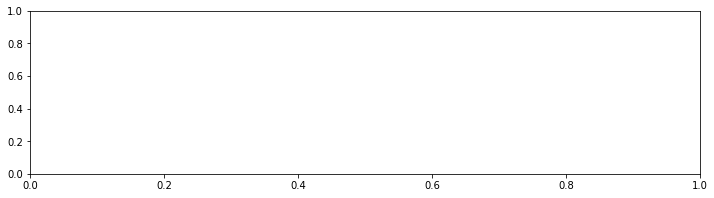

In [57]:
plt.figure(figsize=(12,3))
sns.histplot(starter_df['actual_bonus_perc'])
plt.title('Distribution of NEO stock awards less than $15M')

plt.xlabel('NEO Stock Award');